In [1]:
import HARK.ConsumptionSaving.ConsumerParameters as Params
from HARK.ConsumptionSaving.ConsIndShockModel import (
    PerfForesightConsumerType,
    IndShockConsumerType,
    KinkedRconsumerType,
)
from HARK.utilities import plotFuncsDer, plotFuncs
from time import time

In [2]:
mystr = lambda number: "{:.4f}".format(number)

In [3]:
do_simulation = True

In [4]:
# Make and solve an example perfect foresight consumer
PFexample = PerfForesightConsumerType()
# Make this type have an infinite horizon
PFexample.cycles = 0

In [5]:
start_time = time()
PFexample.solve()
end_time = time()
print(
    "Solving a perfect foresight consumer took "
    + mystr(end_time - start_time)
    + " seconds."
)
PFexample.unpackcFunc()
PFexample.timeFwd()

Solving a perfect foresight consumer took 0.6234 seconds.


Perfect foresight consumption function:


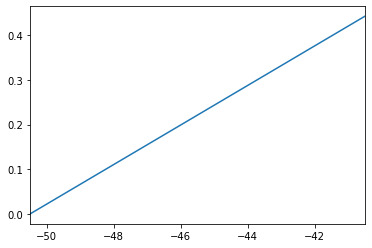

In [6]:
# Plot the perfect foresight consumption function
print("Perfect foresight consumption function:")
mMin = PFexample.solution[0].mNrmMin
plotFuncs(PFexample.cFunc[0], mMin, mMin + 10)

In [7]:
if do_simulation:
    PFexample.T_sim = 120  # Set number of simulation periods
    PFexample.track_vars = ["mNrmNow"]
    PFexample.initializeSim()
    PFexample.simulate()

In [8]:
# Make and solve an example consumer with idiosyncratic income shocks
IndShockExample = IndShockConsumerType()
IndShockExample.cycles = 0  # Make this type have an infinite horizon

In [9]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds."
)
IndShockExample.unpackcFunc()
IndShockExample.timeFwd()






Solving a consumer with idiosyncratic shocks took 0.2175 seconds.


Concave consumption function:


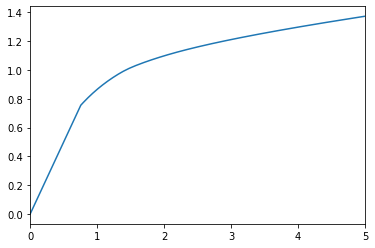

Marginal consumption function:


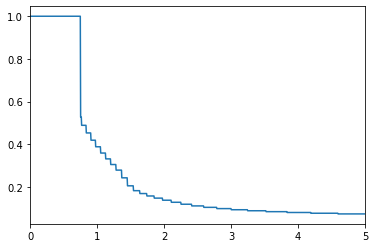

In [10]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plotFuncs(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)
print("Marginal consumption function:")
plotFuncsDer(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)

Consumption functions for perfect foresight vs idiosyncratic shocks:


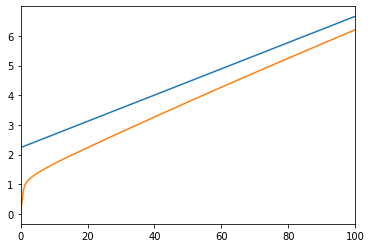

In [11]:
# Compare the consumption functions for the perfect foresight and idiosyncratic
# shock types.  Risky income cFunc asymptotically approaches perfect foresight cFunc.
print("Consumption functions for perfect foresight vs idiosyncratic shocks:")
plotFuncs(
    [PFexample.cFunc[0], IndShockExample.cFunc[0]],
    IndShockExample.solution[0].mNrmMin,
    100,
)

In [12]:
# Compare the value functions for the two types
if IndShockExample.vFuncBool:
    print("Value functions for perfect foresight vs idiosyncratic shocks:")
    plotFuncs(
        [PFexample.solution[0].vFunc, IndShockExample.solution[0].vFunc],
        IndShockExample.solution[0].mNrmMin + 0.5,
        10,
    )

In [13]:
# Simulate some data; results stored in mNrmNow_hist, cNrmNow_hist, and pLvlNow_hist
if do_simulation:
    IndShockExample.T_sim = 120
    IndShockExample.track_vars = ["mNrmNow", "cNrmNow", "pLvlNow"]
    IndShockExample.makeShockHistory()  # This is optional, simulation will draw shocks on the fly if it isn't run.
    IndShockExample.initializeSim()
    IndShockExample.simulate()

In [14]:
# Make and solve an idiosyncratic shocks consumer with a finite lifecycle
LifecycleExample = IndShockConsumerType(**Params.init_lifecycle)
LifecycleExample.cycles = (
    1
)  # Make this consumer live a sequence of periods exactly once

In [15]:
start_time = time()
LifecycleExample.solve()
end_time = time()
print("Solving a lifecycle consumer took " + mystr(end_time - start_time) + " seconds.")
LifecycleExample.unpackcFunc()
LifecycleExample.timeFwd()

Solving a lifecycle consumer took 0.0202 seconds.


Consumption functions while working:


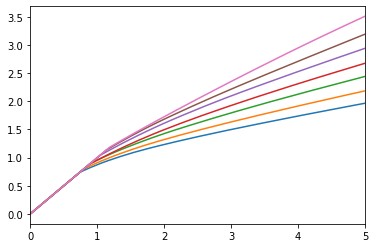

In [16]:
# Plot the consumption functions during working life
print("Consumption functions while working:")
mMin = min(
    [LifecycleExample.solution[t].mNrmMin for t in range(LifecycleExample.T_cycle)]
)
plotFuncs(LifecycleExample.cFunc[: LifecycleExample.T_retire], mMin, 5)

Consumption functions while retired:


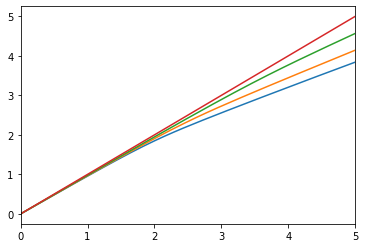

In [17]:
# Plot the consumption functions during retirement
print("Consumption functions while retired:")
plotFuncs(LifecycleExample.cFunc[LifecycleExample.T_retire :], 0, 5)
LifecycleExample.timeRev()

In [18]:
# Simulate some data; results stored in mNrmNow_hist, cNrmNow_hist, pLvlNow_hist, and t_age_hist
if do_simulation:
    LifecycleExample.T_sim = 120
    LifecycleExample.track_vars = ["mNrmNow", "cNrmNow", "pLvlNow", "t_age"]
    LifecycleExample.initializeSim()
    LifecycleExample.simulate()

In [19]:
# Make and solve a "cyclical" consumer type who lives the same four quarters repeatedly.
# The consumer has income that greatly fluctuates throughout the year.
CyclicalExample = IndShockConsumerType(**Params.init_cyclical)
CyclicalExample.cycles = 0

In [20]:
start_time = time()
CyclicalExample.solve()
end_time = time()
print("Solving a cyclical consumer took " + mystr(end_time - start_time) + " seconds.")
CyclicalExample.unpackcFunc()
CyclicalExample.timeFwd()

Solving a cyclical consumer took 0.3813 seconds.


Quarterly consumption functions:


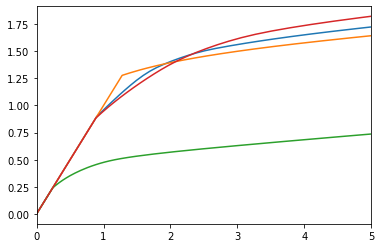

In [21]:
# Plot the consumption functions for the cyclical consumer type
print("Quarterly consumption functions:")
mMin = min([X.mNrmMin for X in CyclicalExample.solution])
plotFuncs(CyclicalExample.cFunc, mMin, 5)

In [22]:
# Simulate some data; results stored in cHist, mHist, bHist, aHist, MPChist, and pHist
if do_simulation:
    CyclicalExample.T_sim = 480
    CyclicalExample.track_vars = ["mNrmNow", "cNrmNow", "pLvlNow", "t_cycle"]
    CyclicalExample.initializeSim()
    CyclicalExample.simulate()

In [23]:
# Make and solve an agent with a kinky interest rate
KinkyExample = KinkedRconsumerType()
KinkyExample.cycles = 0  # Make the Example infinite horizon

Solving a kinky consumer took 0.5089 seconds.
Kinky consumption function:


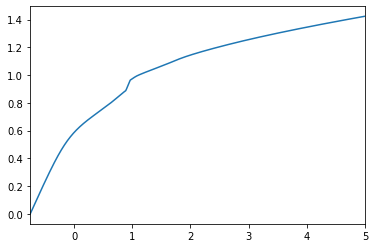

In [24]:
start_time = time()
KinkyExample.solve()
end_time = time()
print("Solving a kinky consumer took " + mystr(end_time - start_time) + " seconds.")
KinkyExample.unpackcFunc()
print("Kinky consumption function:")
KinkyExample.timeFwd()
plotFuncs(KinkyExample.cFunc[0], KinkyExample.solution[0].mNrmMin, 5)

In [25]:
if do_simulation:
    KinkyExample.T_sim = 120
    KinkyExample.track_vars = ["mNrmNow", "cNrmNow", "pLvlNow"]
    KinkyExample.initializeSim()
    KinkyExample.simulate()